In [1]:
# conda install -c conda-forge mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv(r'C:\Users\RAHUL CHAUHAN\Downloads\Titanic.csv')
books.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


# Data_preprocessing

In [3]:
df=pd.get_dummies(books)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [4]:
df.shape

(2201, 10)

# Apriori Algorithm 

In [5]:
# Association rules with 10% Support & 70% Confidence

In [6]:
# With 10% Support
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Age_Adult, Class_1st)"


In [7]:
# With 70% Confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
1,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
2,(Class_2nd),(Age_Adult),0.129487,0.950477,0.118582,0.915789,0.963505,-0.004492,0.588085
3,(Age_Adult),(Class_2nd),0.950477,0.129487,0.118582,0.124761,0.963505,-0.004492,0.994601
4,(Class_3rd),(Gender_Male),0.320763,0.786461,0.231713,0.722380,0.918520,-0.020555,0.769177
...,...,...,...,...,...,...,...,...,...
101,"(Gender_Male, Age_Adult)","(Survived_No, Class_Crew)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
102,(Survived_No),"(Class_Crew, Gender_Male, Age_Adult)",0.676965,0.391640,0.304407,0.449664,1.148157,0.039280,1.105434
103,(Class_Crew),"(Survived_No, Gender_Male, Age_Adult)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802
104,(Gender_Male),"(Survived_No, Class_Crew, Age_Adult)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622


In [8]:
#leverage value : 0 indicates independence. Range will be [-1 1]
# High conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [9]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
65,"(Gender_Female, Age_Adult)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
68,(Survived_Yes),"(Gender_Female, Age_Adult)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
18,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
19,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
66,"(Survived_Yes, Age_Adult)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,0.080121,1.521732
67,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
96,"(Survived_No, Class_Crew)","(Gender_Male, Age_Adult)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079
101,"(Gender_Male, Age_Adult)","(Survived_No, Class_Crew)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
48,"(Gender_Male, Age_Adult)",(Class_Crew),0.757383,0.402090,0.391640,0.517097,1.286022,0.087104,1.238157
49,(Class_Crew),"(Gender_Male, Age_Adult)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480


In [10]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
1,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
8,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
9,(Survived_No),(Class_3rd),0.676965,0.320763,0.239891,0.354362,1.104747,0.022745,1.052040
10,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621
...,...,...,...,...,...,...,...,...,...
101,"(Gender_Male, Age_Adult)","(Survived_No, Class_Crew)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
102,(Survived_No),"(Class_Crew, Gender_Male, Age_Adult)",0.676965,0.391640,0.304407,0.449664,1.148157,0.039280,1.105434
103,(Class_Crew),"(Survived_No, Gender_Male, Age_Adult)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802
104,(Gender_Male),"(Survived_No, Class_Crew, Age_Adult)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622


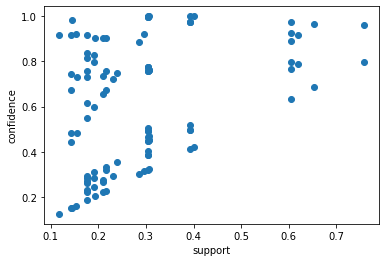

In [11]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [12]:
# Association rules with 20% Support & 60% Confidence

In [13]:
# With 20% Support
frequent_itemsets1 = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.320763,(Class_3rd)
1,0.402090,(Class_Crew)
2,0.213539,(Gender_Female)
3,0.786461,(Gender_Male)
4,0.950477,(Age_Adult)
5,0.676965,(Survived_No)
6,0.323035,(Survived_Yes)
7,0.231713,"(Class_3rd, Gender_Male)"
8,0.284871,"(Class_3rd, Age_Adult)"
9,0.239891,"(Class_3rd, Survived_No)"


In [14]:
# With 60% Confidence
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.6)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Class_3rd),(Gender_Male),0.320763,0.786461,0.231713,0.722380,0.918520,-0.020555,0.769177
1,(Gender_Male),(Class_3rd),0.786461,0.320763,0.231713,0.294627,0.918520,-0.020555,0.962947
2,(Class_3rd),(Age_Adult),0.320763,0.950477,0.284871,0.888102,0.934375,-0.020008,0.442572
3,(Age_Adult),(Class_3rd),0.950477,0.320763,0.284871,0.299713,0.934375,-0.020008,0.969941
4,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
...,...,...,...,...,...,...,...,...,...
65,"(Gender_Male, Age_Adult)","(Survived_No, Class_Crew)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
66,(Survived_No),"(Class_Crew, Gender_Male, Age_Adult)",0.676965,0.391640,0.304407,0.449664,1.148157,0.039280,1.105434
67,(Class_Crew),"(Survived_No, Gender_Male, Age_Adult)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802
68,(Gender_Male),"(Survived_No, Class_Crew, Age_Adult)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622


In [15]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
5,(Survived_No),(Class_3rd),0.676965,0.320763,0.239891,0.354362,1.104747,0.022745,1.052040
6,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621
7,(Gender_Male),(Class_Crew),0.786461,0.402090,0.391640,0.497978,1.238474,0.075412,1.191004
8,(Class_Crew),(Age_Adult),0.402090,0.950477,0.402090,1.000000,1.052103,0.019913,inf
9,(Age_Adult),(Class_Crew),0.950477,0.402090,0.402090,0.423040,1.052103,0.019913,1.036311
10,(Survived_No),(Class_Crew),0.676965,0.402090,0.305770,0.451678,1.123325,0.033569,1.090436
11,(Class_Crew),(Survived_No),0.402090,0.676965,0.305770,0.760452,1.123325,0.033569,1.348519
12,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
13,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116


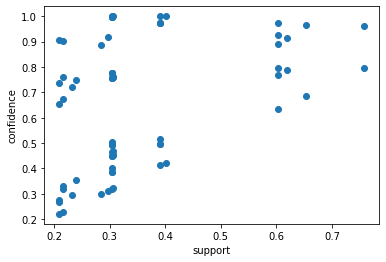

In [16]:
# visualization of obtained rule
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [17]:
#Association rules with 5% Support and 80% confidence
# With 5% Support
frequent_itemsets2=apriori(df,min_support=0.05,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
...,...,...
58,0.053612,"(Survived_No, Gender_Male, Age_Adult, Class_1st)"
59,0.069968,"(Gender_Male, Survived_No, Class_2nd, Age_Adult)"
60,0.175829,"(Class_3rd, Survived_No, Gender_Male, Age_Adult)"
61,0.304407,"(Survived_No, Class_Crew, Gender_Male, Age_Adult)"


In [18]:
# With 80% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender_Female),(Class_1st),0.213539,0.147660,0.065879,0.308511,2.089329,0.034348,1.232615
1,(Class_1st),(Gender_Female),0.147660,0.213539,0.065879,0.446154,2.089329,0.034348,1.419998
2,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
3,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
4,(Survived_Yes),(Class_1st),0.323035,0.147660,0.092231,0.285513,1.933584,0.044531,1.192940
...,...,...,...,...,...,...,...,...,...
217,"(Class_Crew, Survived_Yes)","(Gender_Male, Age_Adult)",0.096320,0.757383,0.087233,0.905660,1.195776,0.014282,2.571740
218,"(Class_Crew, Age_Adult)","(Survived_Yes, Gender_Male)",0.402090,0.166742,0.087233,0.216949,1.301104,0.020188,1.064117
219,(Gender_Male),"(Class_Crew, Survived_Yes, Age_Adult)",0.786461,0.096320,0.087233,0.110919,1.151565,0.011481,1.016420
220,(Class_Crew),"(Survived_Yes, Gender_Male, Age_Adult)",0.402090,0.153567,0.087233,0.216949,1.412737,0.025486,1.080943


In [19]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender_Female),(Class_1st),0.213539,0.147660,0.065879,0.308511,2.089329,0.034348,1.232615
1,(Class_1st),(Gender_Female),0.147660,0.213539,0.065879,0.446154,2.089329,0.034348,1.419998
2,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
3,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
4,(Survived_Yes),(Class_1st),0.323035,0.147660,0.092231,0.285513,1.933584,0.044531,1.192940
...,...,...,...,...,...,...,...,...,...
217,"(Class_Crew, Survived_Yes)","(Gender_Male, Age_Adult)",0.096320,0.757383,0.087233,0.905660,1.195776,0.014282,2.571740
218,"(Class_Crew, Age_Adult)","(Survived_Yes, Gender_Male)",0.402090,0.166742,0.087233,0.216949,1.301104,0.020188,1.064117
219,(Gender_Male),"(Class_Crew, Survived_Yes, Age_Adult)",0.786461,0.096320,0.087233,0.110919,1.151565,0.011481,1.016420
220,(Class_Crew),"(Survived_Yes, Gender_Male, Age_Adult)",0.402090,0.153567,0.087233,0.216949,1.412737,0.025486,1.080943


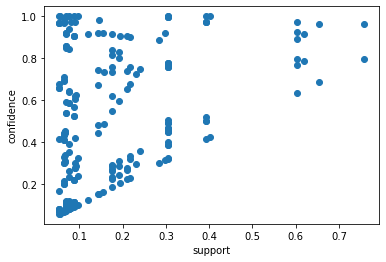

In [20]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()